### Import Library yang Dibutuhkan

In [9]:
import os
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from skimage.feature import graycomatrix, graycoprops
from scipy.stats import entropy
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay)
from sklearn.feature_selection import SelectKBest, f_classif
import seaborn as sns

Kode di atas berfungsi untuk mengimpor berbagai library Python yang esensial, masing-masing dengan peran spesifik sendiri:

* Script `import os` digunakan untuk mengimpor library `os` yang digunakan dalam pengelolaan file dan direktori, seperti membaca nama file dalam folder atau membuat path file secara dinamis.

* Script `import cv2 as cv` digunakan untuk mengimpor library OpenCV yang berfungsi dalam pengolahan citra dan video, seperti membaca gambar, mengubah ukuran, atau mengaplikasikan filter.

* Script `import matplotlib.pyplot as plt` digunakan untuk mengimpor library `matplotlib.pyplot` yang digunakan untuk membuat plot grafik dan visualisasi data, termasuk menampilkan gambar hasil pengolahan.

* Script `import numpy as np` digunakan untuk mengimpor library Numpy sebagai alat bantu matematika, terutama untuk operasi numerik dan manipulasi array dalam pengolahan citra.

* Script `import pandas as pd` digunakan untuk mengimpor library Pandas yang digunakan untuk membaca dan mengolah data dalam bentuk tabel atau dataframe, sering digunakan dalam pengelolaan dataset.

* Script `from sklearn.model_selection import train_test_split, cross_val_predict` digunakan untuk mengimpor fungsi `train_test_split` dan `cross_val_predict` yang digunakan untuk membagi data menjadi data latih dan uji serta melakukan validasi silang dalam pelatihan model.

* Script `from sklearn.metrics import accuracy_score, classification_report` digunakan untuk mengimpor fungsi evaluasi `accuracy_score` dan `classification_report` yang digunakan untuk mengukur akurasi model dan memberikan ringkasan hasil klasifikasi.

* Script `from skimage.feature import graycomatrix, graycoprops` digunakan untuk mengimpor fungsi dari `skimage.feature` yang digunakan untuk menghitung matriks ko-ocurrence tingkat abu-abu dan properti tekstur dari citra.

* Script `from scipy.stats import entropy` digunakan untuk mengimpor fungsi `entropy` dari `scipy.stats` yang digunakan untuk menghitung nilai entropi sebagai ukuran kompleksitas informasi pada citra.

* Script `from sklearn.ensemble import RandomForestClassifier` digunakan untuk mengimpor algoritma `RandomForestClassifier` dari sklearn yang digunakan untuk klasifikasi berbasis banyak pohon keputusan.

* Script `from sklearn.svm import SVC` digunakan untuk mengimpor algoritma `SVC` (Support Vector Classifier) dari sklearn yang digunakan untuk klasifikasi berbasis pemisahan hyperplane.

* Script `from sklearn.neighbors import KNeighborsClassifier` digunakan untuk mengimpor algoritma `KNeighborsClassifier` dari sklearn yang digunakan untuk klasifikasi berdasarkan kedekatan data (jarak tetangga terdekat).

* Script `from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report` digunakan untuk mengimpor berbagai metrik evaluasi performa model klasifikasi, seperti akurasi, presisi, recall, f1-score, dan confusion matrix.

* Script `from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay)` digunakan untuk mengimpor fungsi `confusion_matrix` dan `ConfusionMatrixDisplay` untuk menghitung dan menampilkan visualisasi confusion matrix hasil klasifikasi.

* Script `import seaborn as sns` digunakan untuk mengimpor library `seaborn` yang digunakan untuk visualisasi data yang lebih informatif dan menarik, terutama dalam menampilkan heatmap dan grafik statistik lainnya.

### Fungsi Resize

In [10]:
def resize(image, new_width, new_height):
    old_height = image.shape[0]
    old_width = image.shape[1]

    if len(image.shape) == 3:
        channels = image.shape[2]
        resized_image = np.zeros((new_height, new_width, channels), dtype=image.dtype)
    else:
        resized_image = np.zeros((new_height, new_width), dtype=image.dtype)

    scale_x = old_width / new_width
    scale_y = old_height / new_height

    for y in range(new_height):
        for x in range(new_width):
            src_x = int(round(x * scale_x))
            src_y = int(round(y * scale_y))

            src_x = min(src_x, old_width - 1)
            src_y = min(src_y, old_height - 1)
            
            resized_image[y, x] = image[src_y, src_x]

    return resized_image

Kode di atas fungsi `resize(image, new_width, new_height)` yang digunakan untuk mengubah ukuran gambar secara manual dengan metode interpolasi tetangga terdekat (nearest neighbor interpolation). Fungsi ini pertama-tama mengambil tinggi dan lebar gambar asli, lalu menentukan apakah gambar tersebut berwarna (memiliki tiga channel seperti RGB) atau grayscale. Berdasarkan informasi tersebut, dibuat array kosong sebagai tempat gambar hasil resize dengan ukuran baru. Kemudian, skala horizontal (`scale_x`) dan vertikal (`scale_y`) dihitung berdasarkan perbandingan ukuran lama dan ukuran baru. Fungsi ini menggunakan dua perulangan bersarang untuk mengisi setiap piksel pada gambar baru. Untuk setiap piksel, dihitung posisi piksel asal pada gambar lama dengan mengalikan indeks baru dengan skala, lalu dibulatkan ke indeks terdekat. Nilai dari piksel terdekat pada gambar asli tersebut kemudian disalin ke posisi piksel baru. Proses ini memastikan bahwa gambar dapat diubah ukurannya tanpa menggunakan fungsi built-in seperti `cv2.resize`, dan pada akhirnya fungsi akan mengembalikan citra hasil perubahan ukuran.

## Ambil Data

Struktur folder dataset sebagai berikut:
```
.
└──Dog
    ├── label1
    ├   ├── image1.jpg
    ├   ├── image2.jpg
    ├   ├── image3.jpg
    ├   └── dst..
    ├── label2
    ├── label3
    └── label4
```

In [11]:
data = []
labels = []
file_name = []
for sub_folder in os.listdir("Dogs\\"):
    sub_folder_files = os.listdir(os.path.join("Dogs\\", sub_folder))
    for i, filename in enumerate(sub_folder_files):
        img_path = os.path.join("Dogs\\", sub_folder, filename)
        img = cv.imread(img_path)
        img = img.astype(np.uint8)
        img = resize(img, 256, 256)
        img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        
        data.append(img)
        labels.append(sub_folder)
        name = os.path.splitext(filename)[0]
        file_name.append(filename)
        
data = np.array(data)
labels = np.array(labels)


Kode di atas digunakan untuk membaca dan memproses gambar dari folder dataset bernama "Dogs". Pertama, tiga list kosong disiapkan, yaitu `data` untuk menyimpan citra, `labels` untuk menyimpan label atau nama sub-folder (yang merepresentasikan kelas anjing), dan `file_name` untuk menyimpan nama file gambar. Program kemudian melakukan iterasi pada setiap sub-folder di dalam direktori "Dogs", di mana setiap sub-folder dianggap sebagai satu kelas. Untuk setiap file gambar dalam sub-folder tersebut, program menyusun path lengkap gambar, membaca gambar menggunakan `cv.imread()`, lalu memastikan tipe datanya adalah `uint8` agar sesuai dengan format citra. Selanjutnya, gambar diubah ukurannya menjadi 256x256 piksel menggunakan fungsi `resize()`, dan kemudian dikonversi ke format grayscale dengan `cv.cvtColor()`. Setelah itu, gambar grayscale yang telah diproses dimasukkan ke dalam list `data`, label kelasnya dimasukkan ke dalam `labels`, dan nama file disimpan di `file_name`. Terakhir, list `data` dan `labels` diubah menjadi array NumPy agar lebih efisien digunakan dalam proses machine learning atau pemrosesan lanjutan.

#### Menampilkan Sampel Gambar dalam Grid Per Label

Kode di bawah secara otomatis menyesuaikan jumlah baris yang akan diplot berdasarkan jumlah label unik yang diminta (3 baris). Kemudian, untuk setiap label, skrip akan memilih 5 gambar acak dan menampilkannya di baris yang sesuai. Setiap gambar akan memiliki label kategorinya sebagai judul.

In [ ]:
rows_to_display = 3
cols_to_display = 5
num_samples_per_label = cols_to_display
unique_labels = np.unique(labels)
num_unique_labels = len(unique_labels)

if num_unique_labels < rows_to_display:
    print(f"Peringatan: Hanya ditemukan {num_unique_labels} label unik. Tidak dapat membuat {rows_to_display} baris yang berbeda untuk label.")
    labels_for_display = unique_labels
    actual_rows_plotted = num_unique_labels
else:
    labels_for_display = unique_labels[:rows_to_display]
    actual_rows_plotted = rows_to_display


plt.figure(figsize=(cols_to_display * 3, actual_rows_plotted * 3.5))

current_subplot_index = 1
for label_name in labels_for_display:
    indices_for_label = np.where(labels == label_name)[0]
    
    num_available_for_label = len(indices_for_label)
    
    selected_indices = np.random.choice(
        indices_for_label,
        min(num_available_for_label, num_samples_per_label),
        replace=(num_available_for_label < num_samples_per_label)
    )
    
    for img_idx in selected_indices:
        if current_subplot_index > (actual_rows_plotted * cols_to_display):
            break

        img_display = data[img_idx]
        
        plt.subplot(actual_rows_plotted, cols_to_display, current_subplot_index)
        
        if len(img_display.shape) == 3:
            img_display_rgb = cv.cvtColor(img_display, cv.COLOR_BGR2RGB)
            plt.imshow(img_display_rgb)
        else:
            plt.imshow(img_display, cmap='gray')
            
        plt.title(f'{label_name}', fontsize=10)
        plt.axis('off')
        
        current_subplot_index += 1
    
    if current_subplot_index > (actual_rows_plotted * cols_to_display):
        break

plt.tight_layout(pad=1.5)
plt.show()

## Augmentasi Data

### Fungsi Augmentasi yang Digunakan

#### Fungsi Rotasi

In [12]:
def rotasi(image, sudut):
    height, width = image.shape[0], image.shape[1]
    pusat_rotasi = np.array([width // 2, height // 2])
    rad_rotasi = np.radians(sudut)
    cosine = np.cos(rad_rotasi)
    sine = np.sin(rad_rotasi)

    citra_rotasi = np.zeros_like(image)

    for x in range(height):
        for y in range(width):
            xp = int((x-pusat_rotasi[1]) * cosine - (y - pusat_rotasi[0]) * sine + pusat_rotasi[1])
            yp = int((x - pusat_rotasi[0]) * sine + (y - pusat_rotasi[0]) * cosine + pusat_rotasi[0])
            if 0 <= xp < height and 0 <= yp < width:
                citra_rotasi[x,y] = image[xp, yp]   
    return citra_rotasi

Kode di atas fungsi `rotasi(image, sudut)` yang digunakan untuk melakukan rotasi (perputaran) citra sebesar sudut tertentu secara manual tanpa menggunakan fungsi built-in dari OpenCV. Pertama, tinggi dan lebar citra diambil, lalu titik tengah gambar dihitung sebagai pusat rotasi. Sudut rotasi yang diberikan dalam derajat dikonversi ke radian karena fungsi trigonometri pada NumPy (`cos` dan `sin`) menggunakan radian. Matriks citra kosong dengan ukuran yang sama seperti gambar asli dibuat sebagai wadah untuk hasil rotasi. Kemudian dilakukan iterasi terhadap setiap piksel `(x, y)` pada gambar asli. Untuk setiap piksel, dihitung koordinat barunya `(xp, yp)` menggunakan rumus transformasi rotasi dengan pusat di tengah gambar. Hasil koordinat baru digunakan untuk mengambil nilai piksel dari posisi lama dan menempatkannya di posisi baru jika masih berada dalam batas citra. Jika posisi hasil transformasi valid, maka nilai piksel pada koordinat `(xp, yp)` diambil dari citra asli dan diisikan ke posisi `(x, y)` pada gambar hasil rotasi. Fungsi ini akhirnya mengembalikan gambar yang telah diputar sesuai sudut yang diberikan.

#### Proses Augmentasi Data Gambar

In [13]:

data_augmented = list(data) 
labels_augmented = list(labels) 
file_name_augmented = list(file_name) 

for i in range(len(data)):
    img = data[i]
    label = labels[i]
    original_filename = file_name[i]

    rows, cols = img.shape
    center_x, center_y = cols / 2, rows / 2


    angles = [-30, -25, -20, -15, -10, -5, 5, 10, 15, 20, 25, 30] 
    for angle_deg in angles:
        rotated_img = rotasi(img, angle_deg)
        
        data_augmented.append(rotated_img)
        labels_augmented.append(label)
        file_name_augmented.append(f"{original_filename}_rot{angle_deg}.jpg")

    flipped_h = img[::-1, :]
    data_augmented.append(flipped_h)
    labels_augmented.append(label)
    file_name_augmented.append(f"{original_filename}_flipH.jpg")

    flipped_v = img[:, ::-1]
    data_augmented.append(flipped_v)
    labels_augmented.append(label)
    file_name_augmented.append(f"{original_filename}_flipV.jpg")

data_augmented = np.array(data_augmented)
labels_augmented = np.array(labels_augmented)
file_name_augmented = np.array(file_name_augmented)

Kode di atas digunakan untuk melakukan augmentasi data citra dengan tujuan memperbanyak variasi dataset agar model machine learning yang dilatih menjadi lebih robust. Pertama, `data_augmented`, `labels_augmented`, dan `file_name_augmented` dibuat sebagai salinan dari data asli (`data`, `labels`, dan `file_name`) dalam bentuk list agar dapat ditambahkan elemen baru. Program kemudian melakukan perulangan untuk setiap gambar dalam dataset. Untuk setiap gambar, dilakukan proses augmentasi rotasi menggunakan daftar sudut rotasi tertentu, yaitu dari -30 hingga 30 derajat. Rotasi dilakukan dengan memanggil fungsi `rotasi()` yang telah didefinisikan sebelumnya, dan hasil citra rotasi tersebut ditambahkan ke `data_augmented`, bersama label aslinya dan nama file baru yang mencerminkan sudut rotasinya.

Selain rotasi, dua jenis flipping (pembalikan) juga diterapkan: flipping horizontal (`flipped_h = img[::-1, :]`) membalik gambar dari atas ke bawah, sedangkan flipping vertikal (`flipped_v = img[:, ::-1]`) membalik dari kanan ke kiri. Kedua citra hasil flipping ini juga ditambahkan ke list data augmentasi beserta label dan nama file yang sesuai. Setelah semua augmentasi selesai, list `data_augmented`, `labels_augmented`, dan `file_name_augmented` diubah kembali menjadi array NumPy agar siap digunakan dalam pelatihan model klasifikasi. Proses ini membantu meningkatkan jumlah data pelatihan dengan variasi transformasi sederhana namun efektif.

#### Menampilkan Ukuran Data Sebelum dan Sesudah Augmentasi

In [14]:
print("Data sebelum augmentasi: ", len(data))
print("Data setelah augmentasi: ", len(data_augmented))

Data sebelum augmentasi:  254
Data setelah augmentasi:  3810


Kode di atas digunakan untuk menampilkan jumlah data citra sebelum dan sesudah dilakukan proses augmentasi. Baris pertama mencetak jumlah gambar asli yang terdapat dalam dataset awal dengan menggunakan fungsi `len(data)`. Baris kedua mencetak jumlah total gambar setelah dilakukan augmentasi, seperti rotasi dan flipping, dengan menggunakan `len(data_augmented)`. Informasi ini berguna untuk memastikan bahwa proses augmentasi telah berhasil menambah jumlah data secara signifikan dan dapat menjadi acuan dalam analisis atau evaluasi performa model selanjutnya.

## Data Preparation

### Fungsi Pra-pemrosesan Data

In [15]:
def prepro1(img):
    img = img.astype(np.uint8)
    equalized_img = np.zeros_like(img)

    frekuensi = np.zeros(256)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            warna = img[i,j]
            frekuensi[warna]+=1

    pi = np.zeros_like(frekuensi)
    for i in range(len(frekuensi)):
        pi[i] = frekuensi[i]/(img.shape[0]*img.shape[1])

    cdf = np.zeros_like(pi)
    for i in range(len(pi)):
        if(i == 0):
            cdf[i] = pi[i]
        else:
            cdf[i] = cdf[i-1] + pi[i]
    
    sk = np.zeros_like(cdf)
    sk = np.round(255 * cdf).astype(np.uint8)
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            equalized_img[i,j] = sk[img[i,j]]
    
    return equalized_img

def prepro2(image):
    sharp = ([[1/9, 1/9, 1/9], 
            [1/9, 8/9, 1/9], 
            [1/9, 1/9, 1/9]])
    kernel = np.array(sharp)

    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    padded_img = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')
    result = np.zeros_like(image, dtype=np.float32)

    for i in range(img_height):
        for j in range(img_width):
            region = padded_img[i:i+kernel_height, j:j+kernel_width]
            result[i, j] = np.sum(region * kernel)

    min_val = np.min(result)
    max_val = np.max(result)

    img_norm = (result - min_val) / (max_val - min_val)
    return (img_norm * 255).astype(np.uint8)

def cari_median(array):
    i = len(array)
    baris_array = sorted(array)
    if i % 2 == 0:
        kiri = baris_array[i//2]
        kanan = baris_array[i//2 - 1]
        cari_median = (kiri + kanan)/2
    else:
        cari_median = baris_array[i//2]
        
    return cari_median

def prepro3(image):
    size = 3
    pad = np.pad(image, ((size//2, size//2), (size//2, size//2)), mode='constant', constant_values=0)
    
    result = np.zeros(image.shape).astype(int)
    panjang, lebar = image.shape

    for i in range(panjang):
        for j in range(lebar):
            temp = np.zeros(size * size)
            indeks = 0
            for k in range(size):
                for l in range(size):
                    temp[indeks] += pad[i+k,j+l]
                    indeks+=1
            result[i,j] = cari_median(temp)         
    return result

def prepro4(img):
    kernelx = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ])

    kernely = np.array([
        [-1, -2, -1],
        [0,   0,  0],
        [1,   2,  1]
    ])

    pad = kernelx.shape[0] // 2
    img_padded = np.pad(img, ((pad, pad), (pad, pad)), mode='constant')

    tinggi, lebar = img.shape
    x = np.zeros((tinggi, lebar))
    y = np.zeros((tinggi, lebar))
    m = np.zeros((tinggi, lebar))

    for i in range(tinggi):
        for j in range(lebar):
            region = img_padded[i:i+kernelx.shape[0], j:j+kernelx.shape[1]]
            x[i, j] = np.sum(region * kernelx)
            y[i, j] = np.sum(region * kernely)
            m[i, j] = np.sqrt(x[i, j]**2 + y[i, j]**2)

    min_val = np.min(m)
    max_val = np.max(m)

    img_norm = (m - min_val) / (max_val - min_val)
    return (img_norm * 255).astype(np.uint8)

def prepro5(img):
    result = np.where(img > 20, 255, 0).astype(np.uint8)
    return result

Kode di atas merupakan tahapan pra-pemrosesan citra yang bertujuan untuk meningkatkan kualitas atau menyesuaikan karakteristik gambar sebelum diekstraksi fitur atau diklasifikasikan. Fungsi `prepro1` melakukan *histogram equalization* secara manual, yang bertujuan untuk meningkatkan kontras gambar dengan meratakan distribusi intensitas piksel berdasarkan nilai *Cumulative Distribution Function (CDF)*. Selanjutnya, `prepro2` menerapkan filter penajaman (*sharpening*) menggunakan kernel konvolusi untuk menonjolkan tepi dan detail dalam citra. Fungsi `prepro3` menerapkan *median filtering* untuk menghilangkan noise, terutama noise impulsif seperti *salt and pepper*, dengan mengganti nilai piksel dengan nilai median dari lingkungan sekitarnya. Fungsi `prepro4` melakukan deteksi tepi menggunakan operator Sobel pada arah x dan y, menghasilkan peta gradien dari tepi objek yang kemudian dinormalisasi agar skala intensitasnya seragam. Terakhir, `prepro5` melakukan segmentasi biner berdasarkan ambang batas (thresholding), yaitu menetapkan piksel bernilai lebih dari 20 menjadi 255 (putih) dan sisanya menjadi 0 (hitam), sehingga hanya objek terang yang disorot. Rangkaian fungsi ini penting untuk memperjelas struktur dan kontur objek dalam citra agar analisis lebih akurat.

### Pra-pemrosesan

#### Pra-pemrosesan Data dengan Kombinasi Fungsi

In [ ]:
all_processed_stages = []
dataPreprocessed = []o

for i in range(len(data_augmented)):
    img = data_augmented[i]
    current_stages = {"Original": img.copy()}

    img_proc = prepro1(img)
    current_stages["prepro1"] = img_proc.copy()

    img_proc = prepro2(img_proc)
    current_stages["prepro2"] = img_proc.copy()

    img_proc = prepro3(img_proc)
    current_stages["prepro3"] = img_proc.copy()

    img_proc = prepro4(img_proc)
    current_stages["prepro4"] = img_proc.copy()

    img_final_proc = prepro5(img_proc)
    current_stages["prepro5"] = img_final_proc.copy()

    all_processed_stages.append(current_stages)
    dataPreprocessed.append(img_final_proc.astype(np.uint8))

Kode di atas digunakan untuk melakukan preprocessing pada seluruh dataset hasil augmentasi dengan menerapkan fungsi `prepro1`, yaitu ekualisasi histogram pada setiap gambar. Pertama, sebuah list kosong `dataPreprocessed` disiapkan untuk menampung gambar hasil preprocessing. Kemudian, program melakukan iterasi pada setiap gambar di dalam `data_augmented`. Untuk setiap gambar, fungsi `prepro1` dipanggil untuk memperbaiki kontras gambar dengan metode ekualisasi histogram secara manual. Hasil gambar yang telah diproses kemudian dikonversi ke tipe data `uint8` dan ditambahkan ke dalam list `dataPreprocessed`. Dengan cara ini, seluruh dataset yang telah diperbesar dengan augmentasi juga menjadi lebih siap dan optimal untuk digunakan dalam pelatihan model atau analisis lanjutan.

#### Menampilkan Sampel Gambar per Label dengan Evolusi Pra-pemrosesan

Kode di bawah ini akan secara otomatis memilih 5 gambar dari setiap label unik di dataset Anda. Untuk setiap gambar yang dipilih, sebuah jendela plot baru akan muncul. Jendela ini akan menampilkan gambar aslinya di satu sisi, dan di sisi lain, evolusi gambar setelah melewati setiap fungsi pra-pemrosesan secara berurutan. Ini memungkinkan Anda melihat secara langsung bagaimana gambar berubah di setiap tahapan.

In [ ]:
um_samples_per_label = 5
unique_labels = np.unique(labels)

stage_titles = ["Original", "prepro1", "prepro2", "prepro3", "prepro4", "prepro5"]
num_stages = len(stage_titles)

print(f"Memulai visualisasi... Akan menampilkan {num_samples_per_label} gambar per label.")
print(f"Total figure yang akan muncul: {len(unique_labels) * num_samples_per_label} figure.")
print(f"Setiap figure akan memiliki {num_stages} gambar (original + 5 tahap prepro).")

for label_name in unique_labels:
    indices_for_label = np.where(labels == label_name)[0]
    
    num_available_for_label = len(indices_for_label)
    selected_indices = np.random.choice(
        indices_for_label, 
        min(num_available_for_label, num_samples_per_label), 
        replace=(num_available_for_label < num_samples_per_label)
    )
    
    print(f"\nMenampilkan sampel untuk Label: {label_name}")
    for idx_sample in selected_indices:
        current_image_stages = all_processed_stages[idx_sample]
        
        plt.figure(figsize=(num_stages * 4, 5))
        plt.suptitle(f'Evolusi Pra-pemrosesan - Label: {label_name} (Gambar ID: {idx_sample})', fontsize=14, y=1.02)

        for j, stage_title in enumerate(stage_titles):
            img_to_plot = current_image_stages[stage_title]
            
            plt.subplot(1, num_stages, j + 1)
            if len(img_to_plot.shape) == 3:
                plt.imshow(cv.cvtColor(img_to_plot, cv.COLOR_BGR2RGB))
            else:
                plt.imshow(img_to_plot, cmap='gray')
            
            plt.title(stage_title, fontsize=10)
            plt.axis('off')
        
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

### Ekstraksi Fitur

#### Fungsi Ekstraksi Fitur GLCM

In [ ]:
def glcm(image, derajat):
    if derajat == 0:
        angles = [0]
    elif derajat == 45:
        angles = [np.pi / 4]
    elif derajat == 90:
        angles = [np.pi / 2]
    elif derajat == 135:
        angles = [3 * np.pi / 4]
    else:
        raise ValueError("Invalid angle. It should be one of the following: 0, 45, 90, 135.")
    
    glcm = graycomatrix(image, [1], angles, 256, symmetric=True, normed=True)
    return glcm

Kode di atas fungsi `glcm(image, derajat)` yang digunakan untuk menghasilkan matriks co-occurrence tingkat abu-abu (Gray-Level Co-occurrence Matrix atau GLCM) dari sebuah citra grayscale pada sudut rotasi tertentu. Fungsi ini menerima dua parameter, yaitu `image` yang merupakan citra input dan `derajat` yang menentukan arah sudut pengukuran GLCM dalam derajat (hanya menerima nilai 0, 45, 90, atau 135). Berdasarkan nilai sudut tersebut, fungsi mengonversi derajat ke radian yang sesuai, karena fungsi `graycomatrix` dari pustaka `skimage` menggunakan radian untuk mendefinisikan arah. Jika sudut yang diberikan tidak valid, fungsi akan menampilkan error. Selanjutnya, fungsi `graycomatrix` dipanggil dengan jarak piksel 1 dan sudut yang telah ditentukan, serta parameter `symmetric=True` dan `normed=True` agar matriks GLCM simetris dan ternormalisasi. Matriks GLCM ini mengukur seberapa sering pasangan intensitas piksel tertentu muncul dalam arah dan jarak tertentu, yang kemudian dapat digunakan untuk ekstraksi fitur tekstur dalam analisis citra. Fungsi akhirnya mengembalikan matriks GLCM yang dihasilkan tersebut.

#### Fungsi Ekstraksi Fitur Korelasi

In [ ]:
def correlation(matriks):
	return graycoprops(matriks, 'correlation')[0, 0]

Kode di atas fungsi `correlation(matriks)` yang digunakan untuk menghitung nilai fitur tekstur korelasi dari matriks Gray-Level Co-occurrence Matrix (GLCM) yang diberikan sebagai input. Fungsi ini memanfaatkan metode `graycoprops` dari pustaka `skimage.feature`, yang secara khusus dapat mengekstrak berbagai properti tekstur dari matriks GLCM. Parameter `'correlation'` yang dipilih menunjukkan bahwa fungsi akan mengambil nilai korelasi, yang mengukur sejauh mana intensitas piksel berhubungan atau berkorelasi satu sama lain dalam pola tekstur citra. Hasil yang dikembalikan berupa sebuah matriks, sehingga fungsi ini mengambil elemen `[0, 0]` sebagai nilai korelasi tunggal yang relevan untuk citra yang dianalisis. Nilai korelasi ini penting dalam analisis citra karena dapat menggambarkan struktur tekstur dan pola keteraturan dalam gambar.

#### Fungsi Ekstraksi Fitur Disimilaritas

In [ ]:
def dissimilarity(matriks):
    return graycoprops(matriks, 'dissimilarity')[0, 0]

Kode di atas fungsi `dissimilarity(matriks)` yang digunakan untuk menghitung nilai fitur tekstur dissimilarity dari matriks Gray-Level Co-occurrence Matrix (GLCM) yang diberikan. Fungsi ini memanfaatkan metode `graycoprops` dari pustaka `skimage.feature` untuk mengekstrak properti tekstur dari GLCM. Dengan memilih parameter `'dissimilarity'`, fungsi ini mengukur seberapa berbeda intensitas piksel satu dengan yang lain pada pasangan piksel yang berdekatan dalam citra. Nilai yang dikembalikan berupa sebuah matriks, sehingga fungsi mengambil elemen `[0, 0]` sebagai nilai dissimilarity yang relevan untuk citra tersebut. Fitur dissimilarity ini penting dalam analisis tekstur karena menggambarkan tingkat variasi atau ketidaksamaan antara piksel-piksel dalam gambar, yang dapat membantu dalam membedakan pola atau objek dalam citra.

#### Fungsi Ekstraksi Fitur Homogenitas

In [ ]:
def homogenity(matriks):
    return graycoprops(matriks, 'homogeneity')[0, 0]

Kode di atas fungsi `homogenity(matriks)` digunakan untuk menghitung nilai fitur tekstur homogenitas dari matriks Gray-Level Co-occurrence Matrix (GLCM) yang diberikan sebagai input. Fungsi ini memanfaatkan metode `graycoprops` dari pustaka `skimage.feature` untuk mengekstrak berbagai properti tekstur dari GLCM. Dengan memilih parameter `'homogeneity'`, fungsi ini mengukur sejauh mana piksel-piksel dalam citra memiliki nilai intensitas yang serupa dan terdistribusi secara merata. Nilai yang dikembalikan berupa sebuah matriks, sehingga fungsi mengambil elemen `[0, 0]` sebagai nilai homogenitas tunggal yang relevan untuk citra tersebut. Fitur homogenitas ini penting dalam analisis citra karena memberikan gambaran tentang keseragaman tekstur, dimana nilai yang lebih tinggi menunjukkan tekstur yang lebih halus dan seragam.

#### Fungsi Ekstraksi Fitur Homogenitas

In [ ]:
def contrast(matriks):
    return graycoprops(matriks, 'contrast')[0, 0]

Kode di atas fungsi `contrast(matriks)` digunakan untuk menghitung nilai fitur tekstur kontras dari matriks Gray-Level Co-occurrence Matrix (GLCM) yang diberikan sebagai input. Fungsi ini memanfaatkan metode `graycoprops` dari pustaka `skimage.feature` untuk mengekstrak properti tekstur dari GLCM. Dengan memilih parameter `'contrast'`, fungsi ini mengukur tingkat variasi intensitas antara piksel-piksel yang berdekatan dalam citra, yang menggambarkan seberapa besar perbedaan intensitas di dalam gambar. Nilai yang dikembalikan berupa sebuah matriks, sehingga fungsi mengambil elemen `[0, 0]` sebagai nilai kontras tunggal yang relevan untuk citra tersebut. Fitur kontras ini penting dalam analisis citra karena dapat menunjukkan seberapa tajam atau kasar tekstur dalam gambar, di mana nilai kontras yang lebih tinggi menunjukkan variasi intensitas yang lebih besar.

#### Fungsi Ekstraksi Fitur Angular Second Moment (ASM)

In [ ]:
def ASM(matriks):
    return graycoprops(matriks, 'ASM')[0, 0]

Kode di atas Fungsi `ASM(matriks)` digunakan untuk menghitung nilai fitur tekstur Angular Second Moment (ASM) dari matriks Gray-Level Co-occurrence Matrix (GLCM) yang diberikan sebagai input. Fungsi ini memanfaatkan metode `graycoprops` dari pustaka `skimage.feature` untuk mengekstrak properti tekstur dari GLCM. Parameter `'ASM'` yang dipilih menunjukkan ukuran energi atau uniformitas tekstur pada citra, di mana nilai yang lebih tinggi mengindikasikan tekstur yang lebih seragam dan teratur. Fungsi mengembalikan sebuah matriks, sehingga elemen `[0, 0]` diambil sebagai nilai ASM yang relevan untuk citra tersebut. Fitur ASM ini penting dalam analisis citra karena memberikan informasi tentang konsistensi pola intensitas dan digunakan untuk membedakan jenis tekstur berdasarkan tingkat kehalusan atau kekasarannya.

#### Fungsi Ekstraksi Fitur Energi

In [ ]:
def energy(matriks):
    return graycoprops(matriks, 'energy')[0, 0]

Kode di atas Fungsi `energy(matriks)` digunakan untuk menghitung nilai fitur tekstur energi dari matriks Gray-Level Co-occurrence Matrix (GLCM) yang diberikan sebagai input. Fungsi ini memanfaatkan metode `graycoprops` dari pustaka `skimage.feature` untuk mengekstrak properti tekstur dari GLCM. Parameter `'energy'` mengukur keseragaman tekstur dalam citra, yang merupakan akar kuadrat dari Angular Second Moment (ASM). Nilai energi yang lebih tinggi menunjukkan tekstur yang lebih seragam dan kurang bising, sedangkan nilai yang lebih rendah menunjukkan tekstur yang lebih kompleks atau bervariasi. Fungsi mengembalikan sebuah matriks, sehingga elemen `[0, 0]` diambil sebagai nilai energi tunggal yang relevan untuk citra tersebut. Fitur energi ini sering digunakan dalam pengolahan citra untuk mendeskripsikan konsistensi pola tekstur.

#### Fungsi Ekstraksi Fitur Entropi

In [ ]:
def entropyGlcm(matriks):
    return entropy(matriks.ravel())

Kode di atas mendefinisikan fungsi `entropyGlcm(matriks)` yang digunakan untuk menghitung nilai entropi dari matriks Gray-Level Co-occurrence Matrix (GLCM) yang diberikan sebagai input. Entropi merupakan ukuran ketidakteraturan atau kompleksitas tekstur dalam citra, dimana nilai yang lebih tinggi menandakan tekstur yang lebih acak atau tidak teratur. Fungsi ini menggunakan metode `entropy` dari pustaka `scipy.stats` yang menghitung entropi dari data satu dimensi, sehingga matriks GLCM diubah terlebih dahulu menjadi array satu dimensi menggunakan metode `ravel()`. Dengan cara ini, fungsi dapat menghitung seberapa banyak informasi atau ketidakpastian yang terkandung dalam pola tekstur citra, yang berguna untuk analisis dan klasifikasi citra berbasis fitur tekstur.

#### Perhitungan GLCM

In [ ]:
Derajat0 = []
Derajat45 = []
Derajat90 = []
Derajat135 = []
for i in range(len(dataPreprocessed)):
    D0 = glcm(dataPreprocessed[i], 0)
    D45 = glcm(dataPreprocessed[i], 45)
    D90 = glcm(dataPreprocessed[i], 90)
    D135 = glcm(dataPreprocessed[i], 135)
    Derajat0.append(D0)
    Derajat45.append(D45)
    Derajat90.append(D90)
    Derajat135.append(D135)

Kode di atas bertujuan untuk menghitung matriks Gray-Level Co-occurrence Matrix (GLCM) pada empat sudut berbeda yaitu 0°, 45°, 90°, dan 135° untuk setiap citra yang telah dipreproses dalam `dataPreprocessed`. Proses ini dilakukan dengan menggunakan fungsi `glcm` yang sebelumnya sudah didefinisikan. Pada setiap iterasi, citra yang sedang diproses diambil dari list `dataPreprocessed`, lalu matriks GLCM dihitung untuk masing-masing sudut tersebut. Hasil matriks GLCM untuk sudut 0° disimpan ke dalam list `Derajat0`, untuk sudut 45° disimpan ke `Derajat45`, sudut 90° ke `Derajat90`, dan sudut 135° ke `Derajat135`. Dengan cara ini, setiap citra memiliki empat matriks GLCM yang berbeda yang dapat digunakan untuk ekstraksi fitur tekstur pada berbagai arah, sehingga memberikan informasi tekstur yang lebih komprehensif dari citra tersebut.

#### Inisialisasi List untuk Fitur GLCM

In [ ]:
Kontras0, Kontras45, Kontras90, Kontras135 = [], [], [], []
dissimilarity0, dissimilarity45, dissimilarity90, dissimilarity135 =  [], [], [], []
homogenity0, homogenity45, homogenity90, homogenity135 = [], [], [], []
entropy0, entropy45, entropy90, entropy135 =  [], [], [], []
ASM0, ASM45, ASM90, ASM135 =  [], [], [], []
energy0, energy45, energy90, energy135 =  [], [], [], []
correlation0, correlation45, correlation90, correlation135 = [], [], [], []


Kode di atas digunakan untuk membuat beberapa list kosong yang akan menyimpan nilai fitur tekstur hasil ekstraksi dari matriks Gray-Level Co-occurrence Matrix (GLCM) pada empat sudut berbeda, yaitu 0°, 45°, 90°, dan 135°. Fitur-fitur tersebut meliputi kontras, dissimilarity (perbedaan), homogenitas, entropi, Angular Second Moment (ASM), energi, dan korelasi. Setiap fitur memiliki empat list terpisah, masing-masing untuk menyimpan nilai hasil ekstraksi pada sudut yang berbeda. Dengan cara ini, data fitur tekstur dapat dikelompokkan berdasarkan sudut analisisnya, sehingga memudahkan proses analisis lebih lanjut, seperti pelatihan model klasifikasi atau evaluasi performa pengenalan pola citra.

#### Ekstraksi Fitur Korelasi dari GLCM

In [ ]:
for i in range(len(dataPreprocessed)):
    C0 = correlation(Derajat0[i])
    correlation0.append(C0)
    C45 = correlation(Derajat45[i])
    correlation45.append(C45)
    C90 = correlation(Derajat90[i])
    correlation90.append(C90)
    C135 = correlation(Derajat135[i])
    correlation135.append(C135)
    

Kode di atas melakukan ekstraksi fitur tekstur korelasi dari setiap matriks Gray-Level Co-occurrence Matrix (GLCM) yang sudah dihitung untuk empat sudut berbeda (0°, 45°, 90°, dan 135°) pada setiap citra dalam `dataPreprocessed`. Pada setiap iterasi, fungsi `correlation` dipanggil untuk menghitung nilai korelasi dari matriks GLCM pada sudut tertentu. Nilai korelasi hasil perhitungan tersebut kemudian disimpan ke dalam list yang sesuai dengan sudutnya, seperti `correlation0` untuk sudut 0°, `correlation45` untuk sudut 45°, dan seterusnya. Proses ini dilakukan secara berulang untuk seluruh data sehingga menghasilkan kumpulan nilai fitur korelasi yang lengkap untuk setiap citra dan sudut analisis. Fitur korelasi ini penting karena menggambarkan hubungan linear antara intensitas piksel-piksel yang berdekatan dalam citra, yang berguna untuk mengenali pola tekstur.

#### Ekstraksi Fitur Kontras dari GLCM

In [ ]:
for i in range(len(dataPreprocessed)):
    K0 = contrast(Derajat0[i])
    K45 = contrast(Derajat45[i])
    K90 = contrast(Derajat90[i])
    K135 = contrast(Derajat135[i])
    Kontras0.append(K0)
    Kontras45.append(K45)
    Kontras90.append(K90)
    Kontras135.append(K135)

Kode di atas melakukan proses ekstraksi fitur tekstur kontras dari matriks Gray-Level Co-occurrence Matrix (GLCM) pada empat sudut berbeda yaitu 0°, 45°, 90°, dan 135° untuk setiap citra yang sudah dipreproses dalam `dataPreprocessed`. Fungsi `contrast` digunakan untuk menghitung nilai kontras dari setiap matriks GLCM pada sudut tertentu. Nilai kontras ini kemudian disimpan dalam list yang sesuai dengan sudutnya, yaitu `Kontras0` untuk sudut 0°, `Kontras45` untuk sudut 45°, `Kontras90` untuk sudut 90°, dan `Kontras135` untuk sudut 135°. Kontras merupakan fitur tekstur yang mengukur perbedaan intensitas antara piksel-piksel tetangga, sehingga memberikan informasi tentang tingkat variasi atau ketajaman pola tekstur pada citra. Kode ini mengulangi proses tersebut untuk seluruh data yang telah diproses agar menghasilkan kumpulan fitur kontras yang lengkap untuk setiap citra dan arah sudut analisisnya. Kode yang dikomentari sebelumnya menunjukkan pendekatan serupa, namun menggunakan data awal (`data`) sebelum preprocessing.

#### Ekstraksi Fitur Disimilaritas dari GLCM

In [ ]:
for i in range(len(dataPreprocessed)):
    Dis0 = dissimilarity(Derajat0[i])
    Dis45 = dissimilarity(Derajat45[i])
    Dis90 = dissimilarity(Derajat90[i])
    Dis135 = dissimilarity(Derajat135[i])
    dissimilarity0.append(Dis0)
    dissimilarity45.append(Dis45)
    dissimilarity90.append(Dis90)
    dissimilarity135.append(Dis135)

Kode di atas melakukan ekstraksi fitur tekstur dissimilarity dari matriks Gray-Level Co-occurrence Matrix (GLCM) pada empat sudut berbeda yaitu 0°, 45°, 90°, dan 135° untuk setiap citra yang sudah diproses dalam `dataPreprocessed`. Fungsi `dissimilarity` dipanggil untuk menghitung nilai dissimilarity pada masing-masing matriks GLCM pada sudut tertentu. Nilai dissimilarity ini kemudian disimpan ke dalam list yang sesuai dengan sudutnya, seperti `dissimilarity0` untuk sudut 0°, `dissimilarity45` untuk sudut 45°, dan seterusnya. Fitur dissimilarity mengukur seberapa besar perbedaan intensitas antara piksel-piksel yang berdekatan dalam citra, yang memberikan informasi tentang variasi tekstur. Proses ini diulang untuk seluruh citra dalam dataset sehingga diperoleh kumpulan nilai fitur dissimilarity yang lengkap dan siap digunakan untuk analisis atau klasifikasi citra berbasis tekstur. Bagian kode yang dikomentari sebelumnya menunjukkan pendekatan yang sama namun menggunakan data awal (`data`) sebelum preprocessing.

#### Ekstraksi Fitur Homogenitas dari GLCM

In [ ]:
for i in range(len(dataPreprocessed)):
    H0 = homogenity(Derajat0[i])
    H45 = homogenity(Derajat45[i])
    H90 = homogenity(Derajat90[i])
    H135 = homogenity(Derajat135[i])
    homogenity0.append(H0)
    homogenity45.append(H45)
    homogenity90.append(H90)
    homogenity135.append(H135)

Kode di atas digunakan untuk mengekstraksi fitur tekstur homogenity dari matriks Gray-Level Co-occurrence Matrix (GLCM) pada empat sudut berbeda, yaitu 0°, 45°, 90°, dan 135°, untuk setiap citra yang sudah melalui tahap preprocessing dan tersimpan dalam `dataPreprocessed`. Fungsi `homogenity` dipanggil pada setiap matriks GLCM sesuai sudutnya untuk menghitung nilai homogenitas. Nilai-nilai homogenitas hasil ekstraksi tersebut kemudian disimpan ke dalam list yang sesuai berdasarkan sudutnya, seperti `homogenity0` untuk sudut 0°, `homogenity45` untuk sudut 45°, dan seterusnya. Fitur homogenitas mengukur keseragaman intensitas piksel yang berdekatan, yang menunjukkan tingkat kehalusan atau kerapatan pola tekstur pada citra. Proses ini diulang untuk seluruh dataset sehingga diperoleh kumpulan nilai fitur homogenity yang lengkap dan siap digunakan untuk keperluan analisis atau klasifikasi citra. Bagian kode yang dikomentari menunjukkan pendekatan yang sama namun diterapkan pada data asli (`data`) sebelum preprocessing.

#### Ekstraksi Fitur Entropi dari GLCM

In [ ]:
for i in range(len(dataPreprocessed)):
    E0 = entropyGlcm(Derajat0[i])
    E45 = entropyGlcm(Derajat45[i])
    E90 = entropyGlcm(Derajat90[i])
    E135 = entropyGlcm(Derajat135[i])
    entropy0.append(E0)
    entropy45.append(E45)
    entropy90.append(E90)
    entropy135.append(E135)


Kode di atas berfungsi untuk mengekstraksi fitur entropy dari matriks Gray-Level Co-occurrence Matrix (GLCM) pada empat sudut berbeda, yaitu 0°, 45°, 90°, dan 135°, dari setiap citra yang sudah melalui proses preprocessing dan disimpan dalam variabel `dataPreprocessed`. Fungsi `entropyGlcm` digunakan untuk menghitung nilai entropi dari matriks GLCM pada sudut tertentu, yang mengukur tingkat ketidakteraturan atau kompleksitas tekstur dalam citra. Nilai entropi yang diperoleh kemudian disimpan dalam list yang sesuai dengan sudutnya, yaitu `entropy0`, `entropy45`, `entropy90`, dan `entropy135`. Proses ini diulangi untuk seluruh citra agar menghasilkan kumpulan fitur entropi lengkap yang siap digunakan dalam analisis atau pemodelan klasifikasi. Bagian kode yang dikomentari sebelumnya menunjukkan prosedur serupa yang dijalankan pada data awal (`data`) sebelum preprocessing dilakukan.

#### Ekstraksi Fitur Angular Second Moment (ASM) dari GLCM

In [ ]:
for i in range(len(dataPreprocessed)):
    A0 = ASM(Derajat0[i])
    A45 = ASM(Derajat45[i])
    A90 = ASM(Derajat90[i])
    A135 = ASM(Derajat135[i])
    ASM0.append(A0)
    ASM45.append(A45)
    ASM90.append(A90)
    ASM135.append(A135)

Kode di atas digunakan untuk mengekstraksi fitur ASM (Angular Second Moment) dari matriks Gray-Level Co-occurrence Matrix (GLCM) pada empat sudut yaitu 0°, 45°, 90°, dan 135°, untuk setiap citra yang sudah diproses dan disimpan dalam `dataPreprocessed`. Fungsi `ASM` dipanggil untuk menghitung nilai ASM pada masing-masing matriks GLCM yang sesuai sudutnya. ASM adalah ukuran dari uniformitas atau energi tekstur, yang menunjukkan seberapa homogen tekstur pada citra tersebut. Nilai-nilai ASM hasil ekstraksi kemudian dimasukkan ke dalam list terpisah sesuai dengan sudutnya, yaitu `ASM0`, `ASM45`, `ASM90`, dan `ASM135`. Proses ini dilakukan untuk semua citra dalam dataset agar menghasilkan fitur tekstur ASM lengkap yang dapat digunakan dalam analisis lebih lanjut atau untuk proses klasifikasi. Kode yang dikomentari menunjukkan metode serupa yang dijalankan pada data asli sebelum dilakukan preprocessing.

#### Ekstraksi Fitur Energi dari GLCM

In [ ]:
for i in range(len(dataPreprocessed)):
    ER0 = energy(Derajat0[i])
    ER45 = energy(Derajat45[i])
    ER90 = energy(Derajat90[i])
    ER135 = energy(Derajat135[i])
    energy0.append(ER0)
    energy45.append(ER45)
    energy90.append(ER90)
    energy135.append(ER135)

Kode di atas digunakan untuk mengekstraksi fitur energy dari matriks Gray-Level Co-occurrence Matrix (GLCM) pada empat sudut berbeda, yaitu 0°, 45°, 90°, dan 135°, untuk setiap citra yang telah diproses dan disimpan dalam `dataPreprocessed`. Fungsi `energy` memanggil perhitungan energi tekstur dari GLCM, yang mengukur konsentrasi atau kekompakan tekstur dalam citra, sehingga nilai energy yang lebih tinggi menunjukkan tekstur yang lebih seragam. Nilai energi yang dihitung untuk masing-masing sudut kemudian disimpan dalam list yang sesuai yaitu `energy0`, `energy45`, `energy90`, dan `energy135`. Proses ini diulang untuk semua citra dalam dataset agar menghasilkan fitur energi tekstur lengkap yang bisa digunakan untuk analisis lebih lanjut atau klasifikasi. Bagian kode yang dikomentari menunjukkan proses serupa yang diterapkan pada data asli sebelum dilakukan preprocessing.

### Menyimpan Hasil Ekstraksi ke CSV

Kode di bawah berfungsi untuk membuat sebuah DataFrame menggunakan `pandas` yang berisi fitur-fitur tekstur GLCM hasil ekstraksi dari dataset gambar yang sudah melalui augmentasi. Setiap baris DataFrame berisi nama file gambar (`Filename`), label kelas gambar (`Label`),fitur-fitur tekstur dari matriks GLCM untuk empat arah sudut (0°, 45°, 90°, 135°), yaitu Kontras, Homogenitas, Dissimilarity, Entropy, ASM, Energy, dan Korelasi.
Setelah DataFrame dibuat, data tersebut disimpan ke dalam file CSV dengan nama `hasil_ekstraksi_1.csv` tanpa menyertakan indeks baris (`index=False`). Kemudian file CSV ini dibaca kembali ke dalam variabel `hasilEkstrak` sebagai DataFrame, yang memungkinkan untuk ditampilkan, dianalisis, atau digunakan untuk proses machine learning selanjutnya.

In [ ]:
dataTable = {'Filename': file_name_augmented, 'Label': labels_augmented, 
        'Contrast0': Kontras0, 'Contrast45': Kontras45, 'Contrast90': Kontras90, 'Contrast135': Kontras135,
        'Homogeneity0': homogenity0, 'Homogeneity45': homogenity45, 'Homogeneity90': homogenity90, 'Homogeneity135': homogenity135,
        'Dissimilarity0': dissimilarity0, 'Dissimilarity45': dissimilarity45, 'Dissimilarity90': dissimilarity90, 'Dissimilarity135': dissimilarity135,
        'Entropy0': entropy0, 'Entropy45': entropy45, 'Entropy90': entropy90, 'Entropy135': entropy135,
        'ASM0': ASM0, 'ASM45': ASM45, 'ASM90': ASM90, 'ASM135': ASM135,
        'Energy0': energy0, 'Energy45': energy45, 'Energy90': energy90, 'Energy135': energy135,
        'Correlation0': correlation0, 'Correlation45': correlation45, 'Correlation90': correlation90, 'Correlation135': correlation135,
        }
df = pd.DataFrame(dataTable)
df.to_csv('hasil_ekstraksi_1.csv', index=False)

hasilEkstrak = pd.read_csv('hasil_ekstraksi_1.csv')
hasilEkstrak


,Filename,Label,Contrast0,Contrast45,Contrast90,Contrast135,Homogeneity0,Homogeneity45,Homogeneity90,Homogeneity135,...,ASM90,ASM135,Energy0,Energy45,Energy90,Energy135,Correlation0,Correlation45,Correlation90,Correlation135
0,fung1_jpg.rf.0e0deb5ac87a43b13f544b6ca5f45f7e.jpg,Fungal_infections,11810.683594,15167.0,11357.460938,15926.0,0.818370,0.766755,0.825340,0.755083,...,0.390466,0.350871,0.621308,0.597460,0.624873,0.592344,0.609671,0.497523,0.624686,0.472373
1,fung1_jpg.rf.32912b425b9107cd2a7b90ac1c29590a.jpg,Fungal_infections,10437.070312,14857.0,10958.027344,13381.0,0.839494,0.771522,0.831482,0.794221,...,0.409906,0.386707,0.644442,0.611445,0.640239,0.621857,0.643273,0.492103,0.625488,0.542561
2,fung1_jpg.rf.dd65ca74677b2d37918ea70387ee8841.jpg,Fungal_infections,10472.929688,14412.0,10054.570312,13378.0,0.838942,0.778366,0.845376,0.794267,...,0.439011,0.408345,0.659248,0.631854,0.662579,0.639019,0.625679,0.482453,0.640632,0.519584
3,fung2_jpg.rf.2ac413733eea46de3cc94099a6f84950.jpg,Fungal_infections,11323.593750,15632.0,11841.562500,14570.0,0.825861,0.759604,0.817895,0.775936,...,0.364579,0.340424,0.608035,0.575914,0.603804,0.583458,0.642034,0.505060,0.625659,0.538685
4,fung2_jpg.rf.bfdd88f4e794d851c5ddeb630b1765b8.jpg,Fungal_infections,13765.019531,16751.0,12762.949219,18824.0,0.788315,0.742395,0.803725,0.710516,...,0.345093,0.296922,0.579581,0.557996,0.587446,0.544905,0.574247,0.482084,0.605198,0.417988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3805,pic9.jpg_rot20.jpg,Hypersensitivity_allergic_dermatosis,8788.535156,11417.0,7464.726562,10077.0,0.864846,0.824424,0.885204,0.845031,...,0.599033,0.570766,0.763898,0.746304,0.773972,0.755491,0.548833,0.411361,0.616506,0.480449
3806,pic9.jpg_rot25.jpg,Hypersensitivity_allergic_dermatosis,8702.871094,11339.0,7572.304688,9917.0,0.866163,0.825624,0.883550,0.847492,...,0.599824,0.574605,0.765939,0.748255,0.774483,0.758027,0.549988,0.411167,0.608281,0.485012
3807,pic9.jpg_rot30.jpg,Hypersensitivity_allergic_dermatosis,8950.898438,11877.0,8069.355469,10079.0,0.862349,0.817350,0.875906,0.845000,...,0.581792,0.560581,0.756108,0.736387,0.762753,0.748719,0.555379,0.407823,0.599058,0.497470
3808,pic9.jpg_flipH.jpg,Hypersensitivity_allergic_dermatosis,7767.539062,9234.0,5460.585938,9108.0,0.880547,0.857995,0.916025,0.859933,...,0.657658,0.618681,0.793716,0.785678,0.810961,0.786563,0.548937,0.455639,0.683604,0.463067


## Pemilihan Fitur Berbasis Korelasi

Kode di bawah bertujuan untuk melakukan seleksi fitur berdasarkan korelasi antar fitur dalam dataset hasil ekstraksi. Pertama, dihitung matriks korelasi dari fitur-fitur yang ada (tidak termasuk kolom label dan nama file). Kemudian, kode menyaring fitur-fitur yang memiliki korelasi sangat tinggi (absolut lebih besar atau sama dengan threshold 0.95) agar tidak terjadi redundansi fitur dalam data. Jika dua fitur memiliki korelasi di atas threshold, salah satu fitur akan diabaikan (ditandai `False`). Setelah proses penyaringan, fitur yang tersisa dipilih dan disimpan ke variabel `x_new`. Label asli (`y`) tetap diambil dari kolom `Label`. Terakhir, matriks korelasi dari fitur terpilih divisualisasikan menggunakan heatmap dengan warna biru untuk memudahkan interpretasi hubungan antar fitur yang tersisa.

<Axes: >

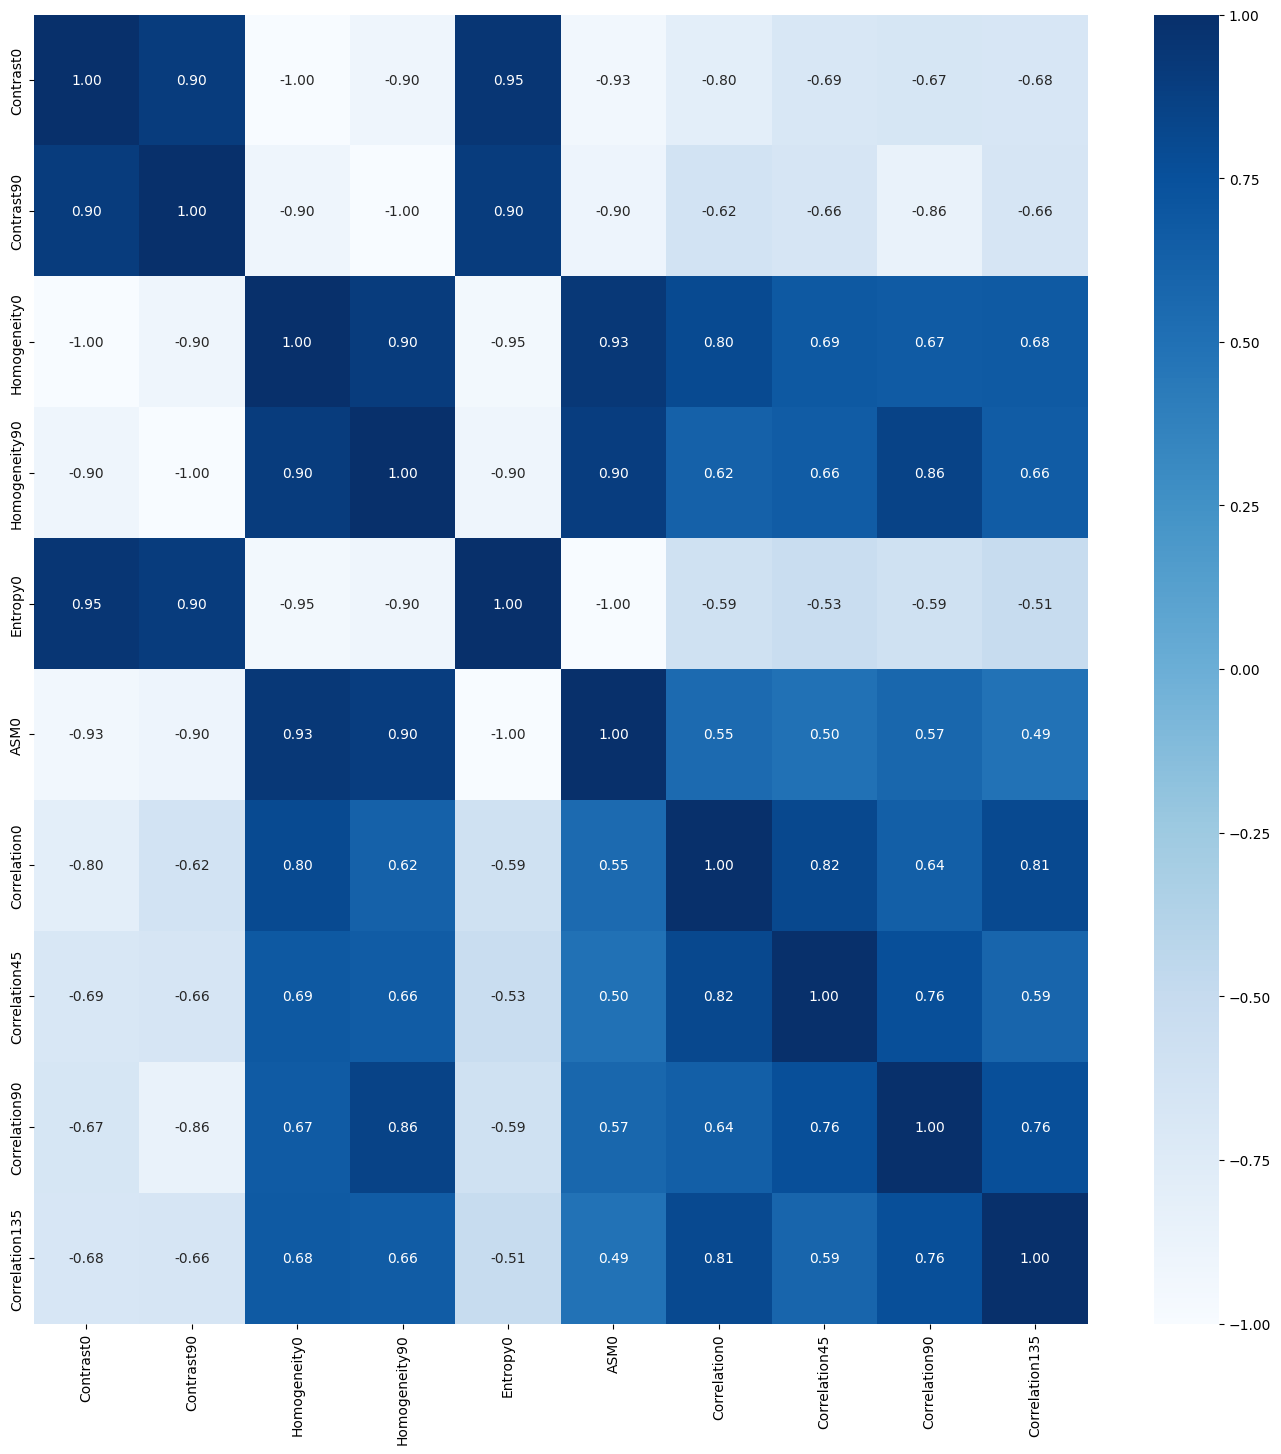

In [ ]:
correlation = hasilEkstrak.drop(columns=['Label','Filename']).corr()

threshold = 0.95
selectionFeature = []
columns = np.full((correlation.shape[0],), True, dtype=bool)
for i in range(correlation.shape[0]):
	for j in range(i+1, correlation.shape[0]):
		if correlation.iloc[i,j] >= threshold:
			if columns[j]:
				columns[j] = False
select = hasilEkstrak.drop(columns=['Label','Filename']).columns[columns]
x_new = hasilEkstrak[select]
x_new
y = hasilEkstrak['Label']
plt.figure(figsize=(17,17))
sns.heatmap(x_new.corr(), annot=True, cmap='Blues', fmt=".2f")


## Pembagian Data untuk Pelatihan dan Pengujian

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(3048, 10)
(762, 10)


Kode di atas digunakan untuk membagi dataset menjadi data pelatihan (*training*) dan data pengujian (*testing*). Variabel `x_new` berisi fitur-fitur yang telah diseleksi (tanpa kolom 'Label' dan 'Filename'), sedangkan `y` berisi label target klasifikasi. Fungsi `train_test_split` dari `sklearn.model_selection` digunakan dengan parameter `test_size=0.2`, yang berarti 20% data dialokasikan untuk pengujian, sementara 80% sisanya digunakan untuk pelatihan model. Parameter `random_state=42` digunakan agar pembagian data bersifat deterministik dan dapat direproduksi. Hasil pembagian ini disimpan ke dalam `X_train`, `X_test`, `y_train`, dan `y_test`, lalu dicetak ukuran masing-masing data agar pengguna mengetahui jumlah sampel pada set pelatihan dan pengujian. Pembagian data ini penting untuk mengevaluasi kinerja model secara adil terhadap data yang belum pernah dilihat sebelumnya.

## Normalisasi Data Fitur

In [ ]:
def normalize_data(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    normalized_data = (data - mean) / std
    return normalized_data
X_train = normalize_data(X_train)
X_test = normalize_data(X_test)

Kode di atas mendefinisikan fungsi `normalize_data` yang menghitung rata-rata (`mean`) dan standar deviasi (`std`) dari data, lalu menormalkan data dengan rumus `(data - mean) / std`. Setelah itu, fungsi ini dipanggil untuk menormalkan `X_train` dan `X_test` secara terpisah.

## Pemodelan

### Pelaporan Klasifikasi dan Inisialisasi Model

In [ ]:
def generateClassificationReport(y_true, y_pred):
	print(classification_report(y_true, y_pred))
	print(confusion_matrix(y_true, y_pred))
	print('Accuracy:', accuracy_score(y_true, y_pred))

rf = RandomForestClassifier(n_estimators=5, random_state=42)
svm = SVC(kernel='rbf', random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

Kode di atas mendefinisikan fungsi `generateClassificationReport` yang digunakan untuk mengevaluasi performa model klasifikasi dengan menampilkan metrik yang lengkap, yaitu precision, recall, f1-score, confusion matrix, serta nilai akurasi dari hasil prediksi. Fungsi ini penting untuk mengetahui sejauh mana model mampu mengenali pola pada data dan memisahkan antar kelas dengan tepat. Dalam kode ini juga didefinisikan tiga jenis algoritma klasifikasi, yaitu Random Forest (`rf`), Support Vector Machine (`svm`), dan K-Nearest Neighbors (`knn`). Random Forest bekerja dengan membangun beberapa pohon keputusan (pada kasus ini sebanyak lima pohon) dan menggabungkan hasilnya untuk membuat prediksi yang lebih stabil. SVM menggunakan kernel radial basis function (RBF) yang efektif untuk memisahkan data yang tidak linear. Sementara itu, KNN mengklasifikasikan data berdasarkan lima tetangga terdekat dalam ruang fitur. Ketiga model ini dapat dilatih menggunakan data hasil ekstraksi fitur, kemudian dievaluasi dengan fungsi `generateClassificationReport` untuk menilai kinerjanya masing-masing dalam menyelesaikan tugas klasifikasi.

### Pelatihan dan Evaluasi Model Random Forest Classifier

Kode di bawah digunakan untuk melatih model Random Forest dan mengevaluasi kinerjanya terhadap data pelatihan (training set) maupun data pengujian (testing set). Pertama-tama, model Random Forest dilatih menggunakan data `X_train` dan `y_train` melalui metode `fit()`. Setelah pelatihan selesai, model digunakan untuk memprediksi label pada data pelatihan, lalu hasil prediksi tersebut dibandingkan dengan label sebenarnya menggunakan fungsi `generateClassificationReport`. Evaluasi ini berguna untuk melihat apakah model mengalami overfitting, yaitu ketika performanya sangat baik pada data pelatihan namun buruk pada data pengujian. Kemudian, model juga diuji pada data pengujian (`X_test`) untuk melihat seberapa baik kemampuan generalisasi model terhadap data yang belum pernah dilihat sebelumnya. Dengan membandingkan hasil pada kedua data tersebut, kita bisa menilai seberapa efektif dan andal model Random Forest dalam mengklasifikasikan data berdasarkan fitur yang telah diekstraksi.

In [ ]:
# Train Random Forest Classifier
rf.fit(X_train, y_train)

# Make predictions and evaluate the model with the training set
print("------Training Set------")
y_pred = rf.predict(X_train)
generateClassificationReport( y_train, y_pred)

# Make predictions and evaluate the model with the testing set
print("\n------Testing Set------")
y_pred = rf.predict(X_test)
generateClassificationReport( y_test, y_pred)

------Training Set------
                                      precision    recall  f1-score   support

                   Fungal_infections       0.96      0.98      0.97       863
                             Healthy       0.98      0.98      0.98      1108
Hypersensitivity_allergic_dermatosis       0.98      0.97      0.97      1077

                            accuracy                           0.97      3048
                           macro avg       0.97      0.97      0.97      3048
                        weighted avg       0.97      0.97      0.97      3048

[[ 844    7   12]
 [  13 1084   11]
 [  25   11 1041]]
Accuracy: 0.9740813648293963

------Testing Set------
                                      precision    recall  f1-score   support

                   Fungal_infections       0.69      0.68      0.68       232
                             Healthy       0.75      0.82      0.78       272
Hypersensitivity_allergic_dermatosis       0.72      0.66      0.69       258

   

### Pelatihan dan Evaluasi Model SVM Classifier

Kode di bawah berfungsi untuk melatih model Support Vector Machine (SVM) dengan kernel radial basis function (RBF) menggunakan data pelatihan `X_train` dan `y_train`. Setelah model SVM dilatih menggunakan fungsi `fit()`, model digunakan untuk memprediksi label dari data pelatihan terlebih dahulu, kemudian hasil prediksinya dibandingkan dengan label aslinya untuk mengevaluasi kinerja model pada data yang sudah dikenalnya. Evaluasi ini dilakukan menggunakan fungsi `generateClassificationReport` yang menampilkan metrik evaluasi seperti precision, recall, f1-score, confusion matrix, dan akurasi. Selanjutnya, model juga digunakan untuk memprediksi label pada data pengujian (`X_test`) guna menilai performa generalisasi model terhadap data baru. Perbandingan hasil pada data pelatihan dan pengujian membantu mengidentifikasi apakah model SVM mengalami overfitting atau justru mampu mengklasifikasikan data secara seimbang dan andal.

In [ ]:
# Train SVM Classifier
svm.fit(X_train, y_train)

# Make predictions and evaluate the model with the training set
print("\n------Training Set------")
y_pred = svm.predict(X_train)
generateClassificationReport( y_train, y_pred)

# Make predictions and evaluate the model with the testing set
print("\n------Testing Set------")
y_pred = svm.predict(X_test)
generateClassificationReport( y_test, y_pred)


------Training Set------
                                      precision    recall  f1-score   support

                   Fungal_infections       0.54      0.63      0.58       863
                             Healthy       0.70      0.71      0.71      1108
Hypersensitivity_allergic_dermatosis       0.54      0.46      0.50      1077

                            accuracy                           0.60      3048
                           macro avg       0.60      0.60      0.60      3048
                        weighted avg       0.60      0.60      0.60      3048

[[546 124 193]
 [ 93 790 225]
 [367 213 497]]
Accuracy: 0.6013779527559056

------Testing Set------
                                      precision    recall  f1-score   support

                   Fungal_infections       0.58      0.64      0.61       232
                             Healthy       0.69      0.73      0.71       272
Hypersensitivity_allergic_dermatosis       0.55      0.47      0.50       258

           

### Pelatihan dan Evaluasi Model KNN Classifier

Kode di bawah digunakan untuk melatih model klasifikasi K-Nearest Neighbors (KNN) dengan jumlah tetangga `k = 5`, menggunakan data pelatihan `X_train` dan label `y_train`. Setelah model dilatih menggunakan fungsi `fit()`, model digunakan untuk memprediksi label dari data pelatihan (`X_train`) dan hasilnya dibandingkan dengan label aslinya (`y_train`) guna mengevaluasi kinerja model terhadap data yang sudah dikenalnya. Evaluasi dilakukan menggunakan fungsi `generateClassificationReport`, yang menampilkan metrik klasifikasi seperti precision, recall, f1-score, confusion matrix, dan akurasi. Kemudian, model KNN juga diuji pada data pengujian (`X_test`) untuk melihat sejauh mana model mampu menggeneralisasi pola dari data pelatihan ke data baru. Perbandingan hasil evaluasi antara data pelatihan dan pengujian memberikan gambaran apakah model KNN overfitting, underfitting, atau memiliki performa klasifikasi yang seimbang.

In [ ]:
# Train KNN Classifier
knn.fit(X_train, y_train)

# Make predictions and evaluate the model with the training set
print("\n------Training Set------")
y_pred = knn.predict(X_train)
generateClassificationReport( y_train, y_pred)

# Make predictions and evaluate the model with the testing set
print("\n------Testing Set------")
y_pred = knn.predict(X_test)
generateClassificationReport( y_test, y_pred)



------Training Set------
                                      precision    recall  f1-score   support

                   Fungal_infections       0.86      0.89      0.87       863
                             Healthy       0.92      0.93      0.93      1108
Hypersensitivity_allergic_dermatosis       0.90      0.87      0.89      1077

                            accuracy                           0.90      3048
                           macro avg       0.89      0.90      0.90      3048
                        weighted avg       0.90      0.90      0.90      3048

[[ 764   34   65]
 [  38 1034   36]
 [  87   54  936]]
Accuracy: 0.8969816272965879

------Testing Set------
                                      precision    recall  f1-score   support

                   Fungal_infections       0.78      0.77      0.77       232
                             Healthy       0.84      0.84      0.84       272
Hypersensitivity_allergic_dermatosis       0.79      0.80      0.79       258

  

## Visualisasi Matriks Kebingungan

Kode di bawah digunakan untuk menampilkan confusion matrix dari hasil prediksi model klasifikasi Random Forest, SVM, dan KNN terhadap data pengujian (`X_test`). Fungsi `plot_confusion_matrix()` menerima tiga argumen: `y_true` (label asli), `y_pred` (label hasil prediksi), dan `title` (judul grafik). Di dalam fungsi tersebut, confusion matrix dihitung menggunakan `confusion_matrix()` dan divisualisasikan menggunakan `ConfusionMatrixDisplay`. Warna biru digunakan untuk memperjelas intensitas jumlah prediksi benar dan salah pada tiap kelas. Fungsi ini kemudian dipanggil tiga kali, masing-masing untuk menampilkan confusion matrix dari model Random Forest, SVM, dan KNN, dengan tujuan untuk memudahkan analisis visual terhadap performa klasifikasi masing-masing model—terutama dalam hal kesalahan klasifikasi antar kelas.

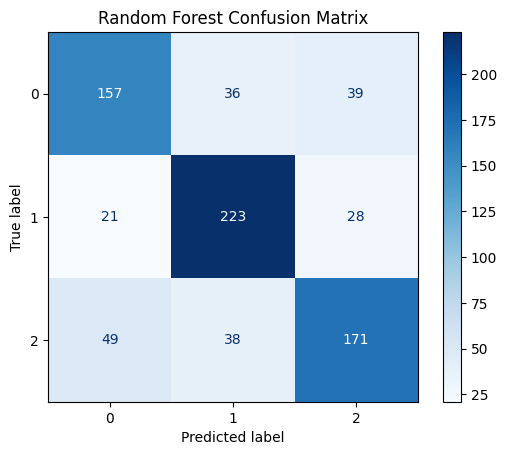

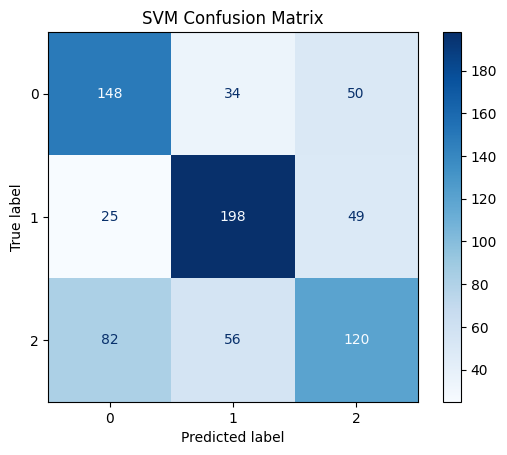

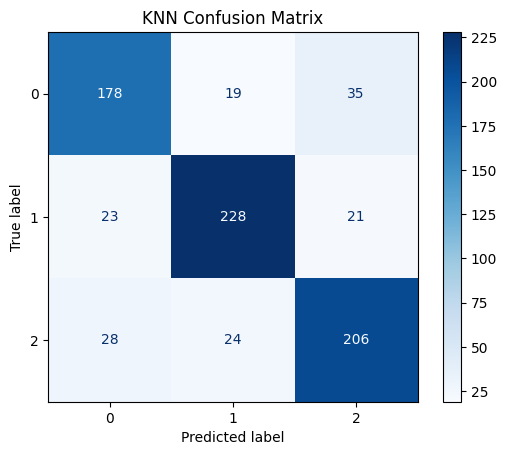

In [ ]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

# Plot confusion matrix for Random Forest
plot_confusion_matrix(y_test, rf.predict(X_test), "Random Forest Confusion Matrix")
# Plot confusion matrix for SVM
plot_confusion_matrix(y_test, svm.predict(X_test), "SVM Confusion Matrix")
# Plot confusion matrix for KNN
plot_confusion_matrix(y_test, knn.predict(X_test), "KNN Confusion Matrix")